<a href="https://colab.research.google.com/github/Tiffany-Kate-Evangelista/School-Files/blob/main/MLP_SSD_Mobile_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, ZeroPadding2D,DepthwiseConv2D, ReLU, Input,AveragePooling2D, GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.activations import sigmoid,relu
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET
import glob
import numpy as np
np.random.seed(42)
import cv2

In [ ]:
def FindNumberBoundingBoxes(root):
    index = 0
    while True:
        if GetInt('xmin', root, index) == -1:
              break
        index += 1
    return index

def GetInt(name, root, index=0):
      return int(GetItem(name, root, index))

def GetItem(name, root, index=0):
    count = 0
    for item in root.iter(name):
        if count == index:
            return item.text
        count += 1
       # Failed to find "index" occurrence of item.
    return -1

def process_xml(xmlfile):
    tree = ET.parse(xmlfile)
    root = tree.getroot()

    num_boxes = FindNumberBoundingBoxes(root)
    attributes = []

    for index in range(num_boxes):
        # Grab the 'index' annotation.
        xmin = GetInt('xmin', root, index)
        ymin = GetInt('ymin', root, index)
        xmax = GetInt('xmax', root, index)
        ymax = GetInt('ymax', root, index)

        width = GetInt('width', root)
        height = GetInt('height', root)
        filename = GetItem('filename', root) + '.JPEG'
        label = GetItem('name', root)

    attributes.append([[xmin,ymin,xmax,ymax],[width],[height],[filename],[label]])
    return attributes

In [ ]:
train_path = "/content/Data/train"
val_path = "/content/Data/test"

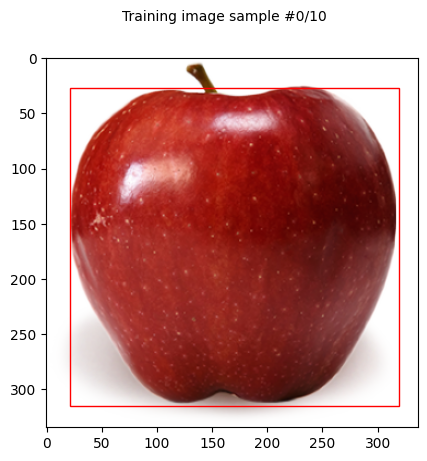

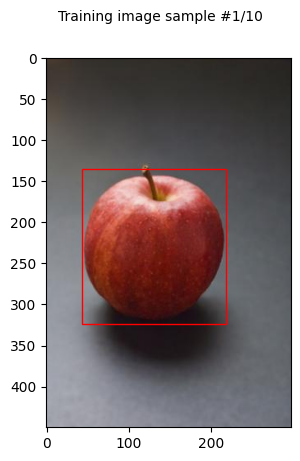

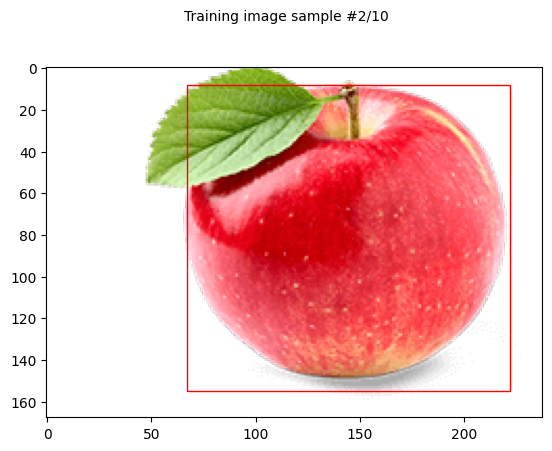

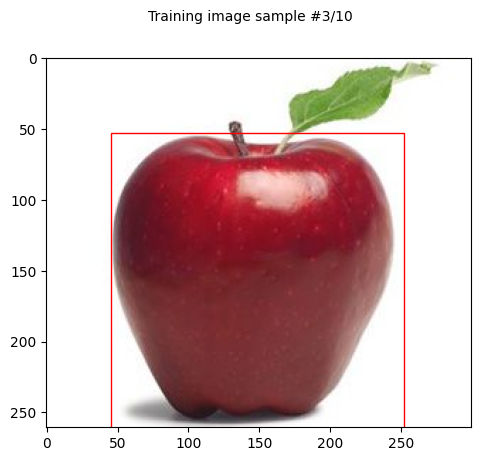

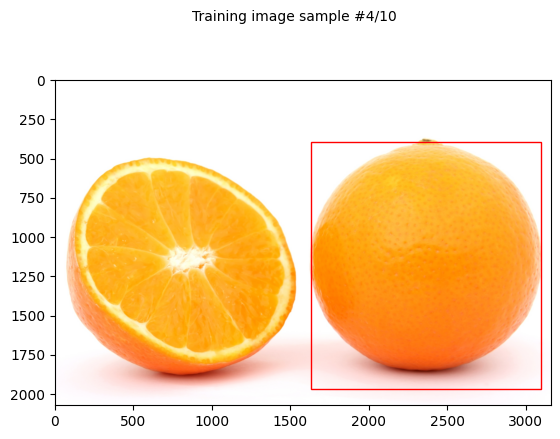

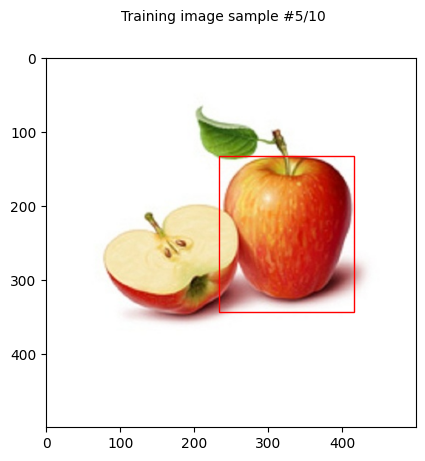

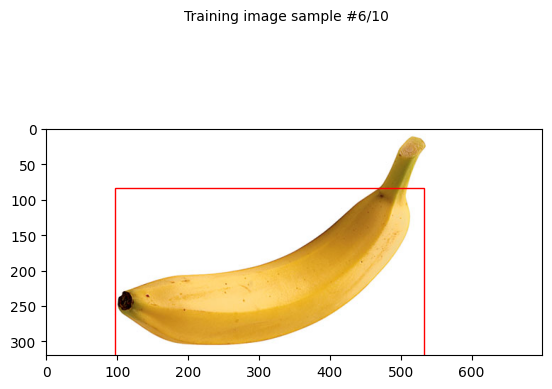

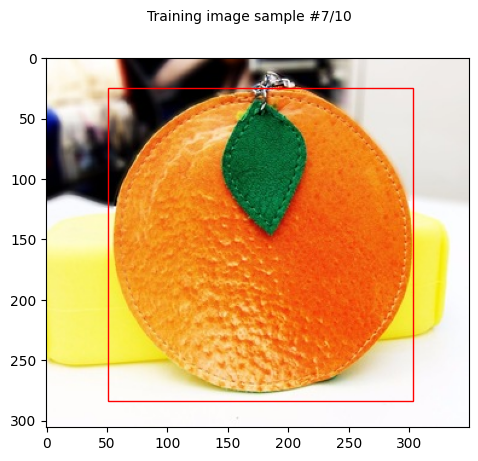

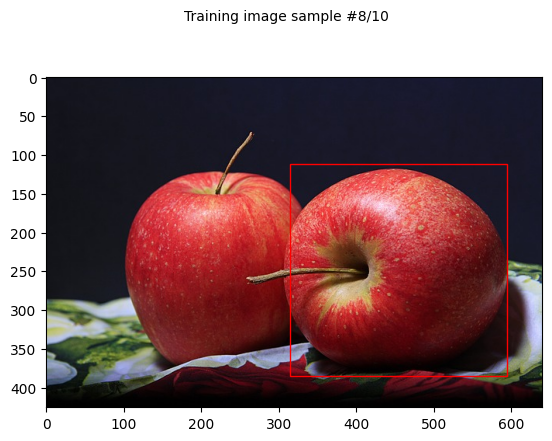

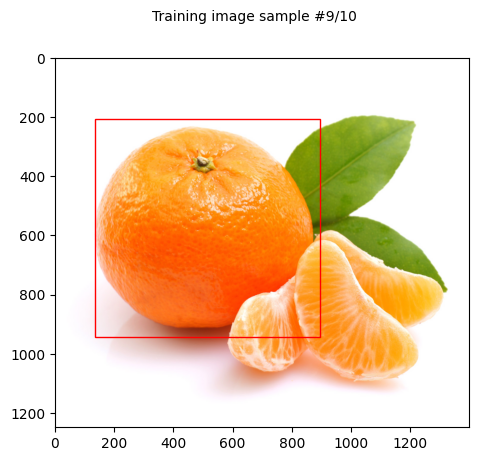

In [ ]:
idx =0
for train_file, train_annotation in zip(glob.glob(train_path+"/*.jpg"),glob.glob(train_path+"/*.xml")):
    #displaying only first 10 images
    if idx<10:
        # Training image processing
        #reading image
        train_image = Image.open(train_file)
        #reading bounding box xml file and processing to fetch xA,yA,xB,yB
        train_annotation = train_file.split('\\')[-1].split('.')[0]+".xml"
        train_content = process_xml(train_annotation)
        #print(train_content,train_image)
        xA,yA,xB,yB = train_content[0][0]
        #processing done
        fig,ax = plt.subplots()
        fig.suptitle("Training image sample #{}/10".format(idx), fontsize=10)

        ax.imshow(train_image)
        rect = patches.Rectangle((xA,yA),xB-xA,yB-yA, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        plt.show()
        idx+=1

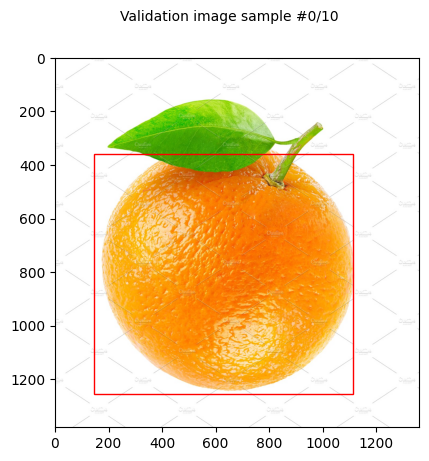

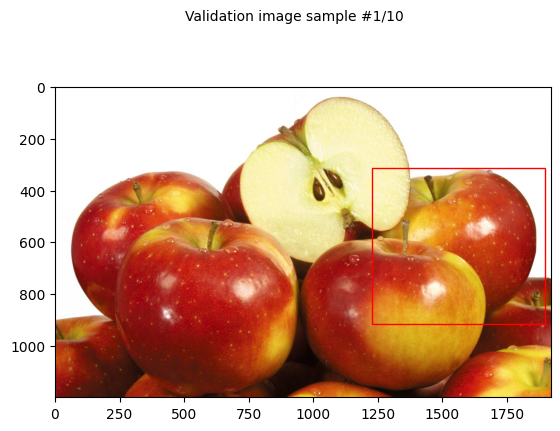

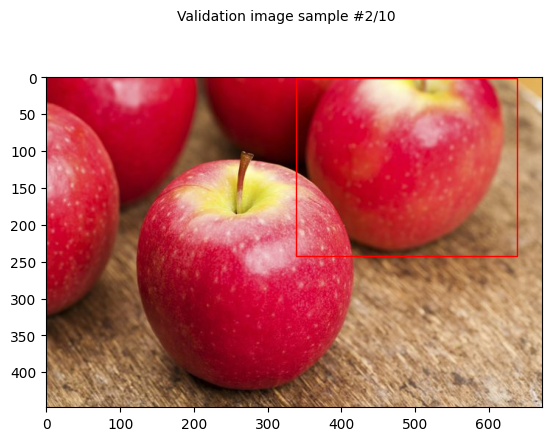

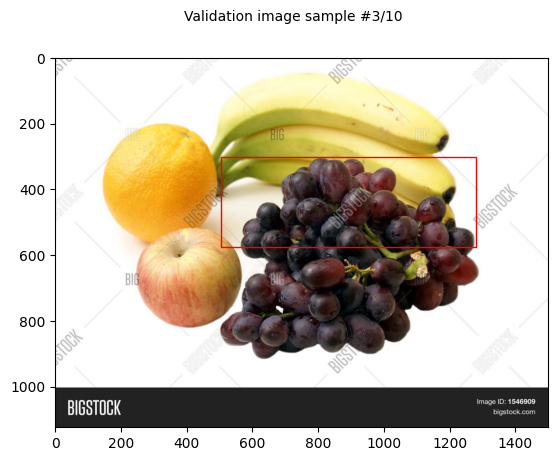

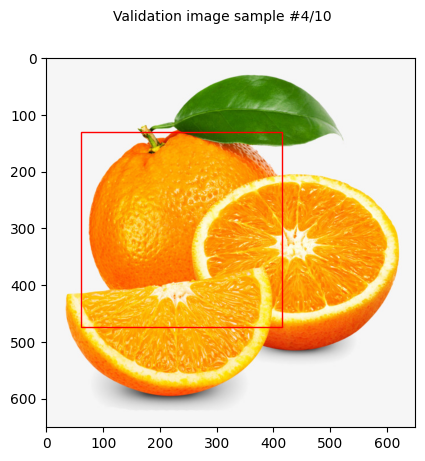

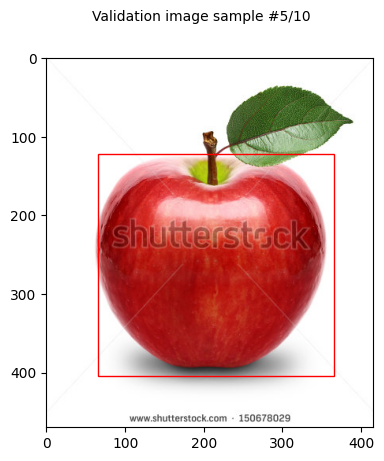

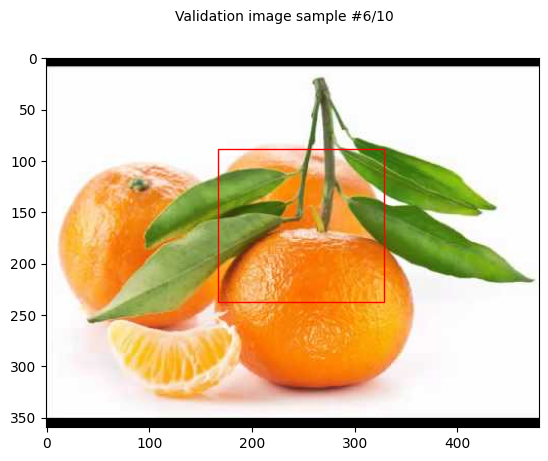

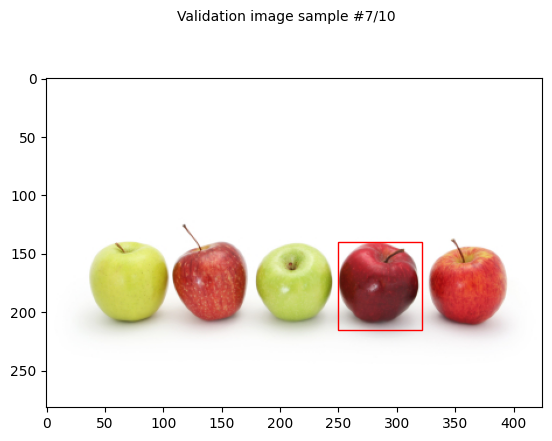

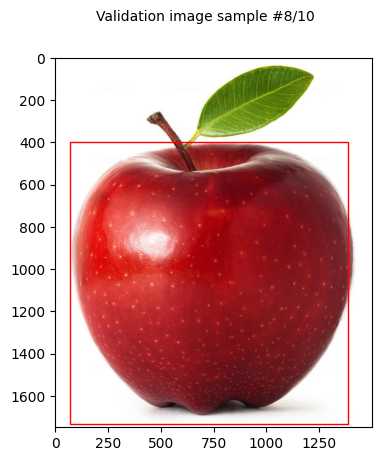

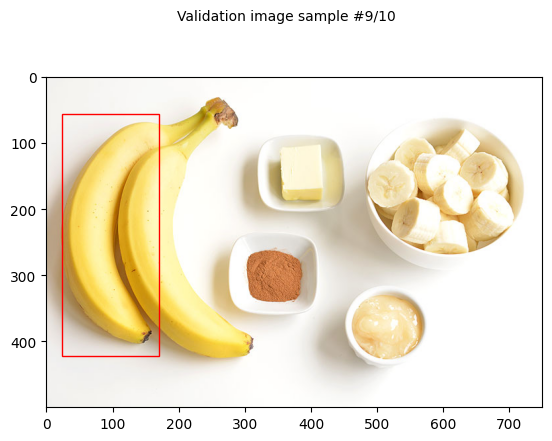

In [ ]:
idx =0
for val_file, val_annotation in zip(glob.glob(val_path+"/*.jpg"),glob.glob(val_path+"/*.xml")):
    #displaying only first 10 images
    if idx<10:
        # Val image processing
        #reading image
        val_image = Image.open(val_file)
        #reading bounding box xml file and processing to fetch xA,yA,xB,yB
        val_annotation = val_file.split('\\')[-1].split('.')[0]+".xml"
        val_content = process_xml(val_annotation)
        #print(train_content,train_image)
        xA,yA,xB,yB = val_content[0][0]
        #processing done
        fig,ax = plt.subplots()
        fig.suptitle("Validation image sample #{}/10".format(idx), fontsize=10)

        ax.imshow(val_image)
        rect = patches.Rectangle((xA,yA),xB-xA,yB-yA, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        plt.show()
        idx+=1


In [ ]:
#now creating 4 lists to store features and labels
LabelDict = {"apple":0,"banana":1, "orange":2}
train_features, train_coordinates, train_labels, val_features,val_coordinates, val_labels = [],[],[],[],[],[]
#creating list of train,val images and xml files
train_images = glob.glob(train_path+"/*.jpg")
val_images = glob.glob(val_path+"/*.jpg")
train_annotations = glob.glob(train_path+"/*.xml")
val_annotations = glob.glob(val_path+"/*.xml")

#helper function for preprocessing
def normalize_annotation(coordinates, original, resized=(150,150)):
    W,H = np.shape(original)[0], np.shape(original)[1]
    #print(coordinates)
    scale_W,scale_H = 224.0/float(W),224.0/float(H)
    coordinates[0],coordinates[2] = coordinates[0]*scale_W,coordinates[2]*scale_W
    coordinates[1],coordinates[3] = coordinates[1]*scale_H,coordinates[3]*scale_H
    #print(coordinates)
    return coordinates

In [ ]:
print(train_images[0],val_images[0],train_annotations[0],val_annotations[0])

/content/Data/train/apple_44.jpg /content/Data/test/orange_95.jpg /content/Data/train/apple_46.xml /content/Data/test/apple_91.xml


In [ ]:
#processing train dataset
for idx1 in range(1,len(train_images)):
    for idx2 in range(1,len(train_annotations)):
        if train_images[idx1].split('\\')[-1].split('.')[0] == train_annotations[idx2].split('\\')[-1].split('.')[0] :
            #open image
            train_image_content = cv2.imread(train_images[idx1])
            #reshaping the image
            resized_image_content = cv2.resize(train_image_content,(224,224), interpolation = cv2.INTER_AREA)
            #fetching the label and bounding box
            label = process_xml(train_annotations[idx2])[0][-1][0]
            bounding_box = process_xml(train_annotations[idx2])[0][0]
            #normalising labels as per new size
            #original shape of image
            normalised_coordinates = normalize_annotation(bounding_box,train_image_content)
            #now appending the data to corresponding lists
            print("Processed {} out {} images".format(idx1,len(train_images)))
            train_features.append(np.asarray(resized_image_content))
            train_coordinates.append(normalised_coordinates)
            train_labels.append([LabelDict[label]])

Processed 1 out 240 images
Processed 2 out 240 images
Processed 3 out 240 images
Processed 4 out 240 images
Processed 5 out 240 images
Processed 6 out 240 images
Processed 7 out 240 images
Processed 8 out 240 images
Processed 9 out 240 images
Processed 10 out 240 images
Processed 11 out 240 images
Processed 12 out 240 images
Processed 13 out 240 images
Processed 14 out 240 images
Processed 15 out 240 images
Processed 16 out 240 images
Processed 17 out 240 images
Processed 18 out 240 images
Processed 19 out 240 images
Processed 20 out 240 images
Processed 21 out 240 images
Processed 22 out 240 images
Processed 23 out 240 images
Processed 24 out 240 images
Processed 25 out 240 images
Processed 26 out 240 images
Processed 27 out 240 images
Processed 28 out 240 images
Processed 29 out 240 images
Processed 30 out 240 images
Processed 31 out 240 images
Processed 32 out 240 images
Processed 33 out 240 images
Processed 34 out 240 images
Processed 35 out 240 images
Processed 36 out 240 images
P

In [ ]:
#processing val dataset
for idx1 in range(1,len(val_images)):
    for idx2 in range(1,len(val_annotations)):
        if val_images[idx1].split('\\')[-1].split('.')[0] == val_annotations[idx2].split('\\')[-1].split('.')[0] :
            #open image
            val_image_content = cv2.imread(val_images[idx1])
            #reshaping the image
            resized_image_content = cv2.resize(val_image_content,(224,224) ,interpolation = cv2.INTER_AREA)
            #fetching the label and bounding box
            label = process_xml(val_annotations[idx2])[0][-1][0]
            bounding_box = process_xml(val_annotations[idx2])[0][0]
            #normalising labels as per new size
            #original shape of image
            normalised_coordinates = normalize_annotation(bounding_box,val_image_content)
            #now appending the data to corresponding lists
            print("Processed {} out {} images".format(idx1,len(val_images)))
            val_features.append(np.asarray(resized_image_content))
            val_coordinates.append(normalised_coordinates)
            val_labels.append([LabelDict[label]])

Processed 1 out 60 images
Processed 2 out 60 images
Processed 3 out 60 images
Processed 4 out 60 images
Processed 5 out 60 images
Processed 6 out 60 images
Processed 7 out 60 images
Processed 8 out 60 images
Processed 9 out 60 images
Processed 10 out 60 images
Processed 11 out 60 images
Processed 12 out 60 images
Processed 13 out 60 images
Processed 14 out 60 images
Processed 15 out 60 images
Processed 16 out 60 images
Processed 17 out 60 images
Processed 18 out 60 images
Processed 19 out 60 images
Processed 20 out 60 images
Processed 21 out 60 images
Processed 22 out 60 images
Processed 24 out 60 images
Processed 25 out 60 images
Processed 26 out 60 images
Processed 27 out 60 images
Processed 28 out 60 images
Processed 29 out 60 images
Processed 30 out 60 images
Processed 31 out 60 images
Processed 32 out 60 images
Processed 33 out 60 images
Processed 34 out 60 images
Processed 35 out 60 images
Processed 36 out 60 images
Processed 37 out 60 images
Processed 38 out 60 images
Processed 

Converting each list to numpy array

In [ ]:
train_features = np.asarray(train_features)
train_coordinates = np.asarray(train_coordinates)
#converting to one hot encoded
train_labels = tf.keras.utils.to_categorical(
    train_labels, num_classes=3, dtype='float32'
)

In [ ]:
val_features = np.asarray(val_features)
val_coordinates = np.asarray(val_coordinates)
#converting to one hot_encoded
val_labels = tf.keras.utils.to_categorical(
    val_labels, num_classes=3, dtype='float32'
)

 Sanity check of the shapes of the dataset

In [ ]:
print("Shape of training features", np.shape(train_features))
print("Shape of training coordinates",np.shape(train_coordinates))
print("shape of training labels", np.shape(train_labels))

Shape of training features (238, 224, 224, 3)
Shape of training coordinates (238, 4)
shape of training labels (238, 3)


In [ ]:
print("Shape of validation features", np.shape(val_features))
print("Shape of validation coordinates",np.shape(val_coordinates))
print("shape of validation labels", np.shape(val_labels))

Shape of validation features (58, 224, 224, 3)
Shape of validation coordinates (58, 4)
shape of validation labels (58, 3)


In [ ]:
Performing sanity check of the resized annotations

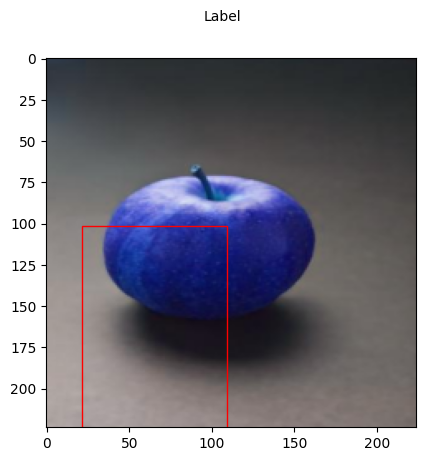

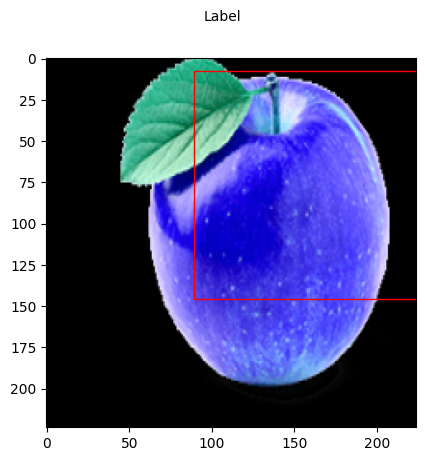

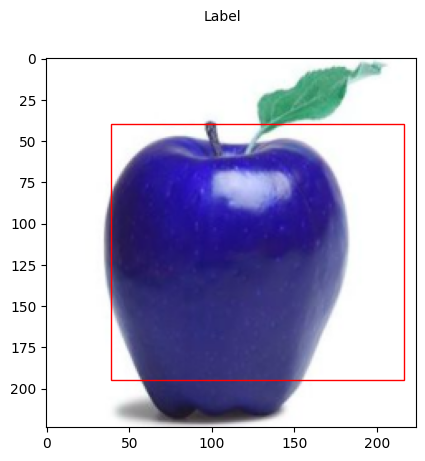

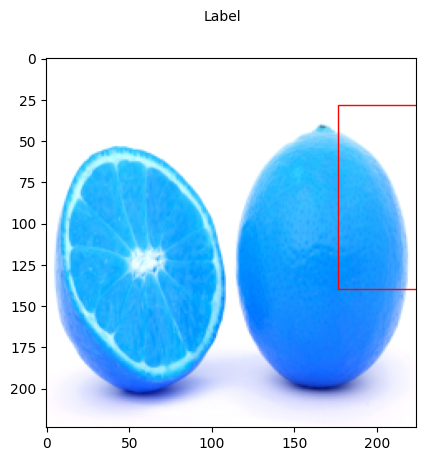

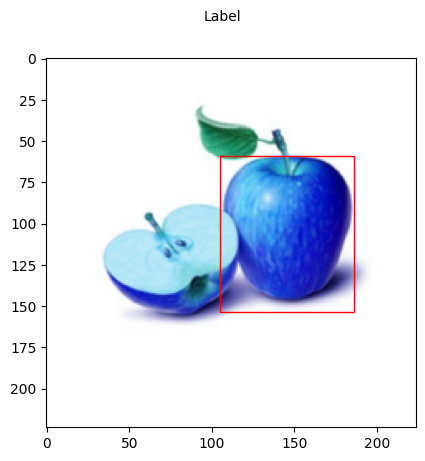

In [ ]:
#validating the resized annotation by visualisation
for i in range(5):
  fig,ax = plt.subplots()
  fig.suptitle("Label".format(train_labels[i]), fontsize=10)
  ax.imshow(train_features[i])
  xA,yA,xB,yB = train_coordinates[i]
  rect = patches.Rectangle((xA,yA),xB-xA,yB-yA, linewidth=1, edgecolor='r',facecolor='none')
  ax.add_patch(rect)

Defining MobileNet v1 ssd architecture

In [ ]:
def MobileNetv1(input_shape, n_coor, number_classes):
   #depth wise convolution block definition
    def depthwise_convolutionBlock(InputTensor, pointwise_filter_size, stride):
    #Depthwise layer
        x = DepthwiseConv2D(3,stride,padding='same')(InputTensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        #Pointwise layer
        x = Conv2D(pointwise_filter_size,1)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    Model_input = Input(input_shape)
    x = Conv2D(32,3,2,padding='same')(Model_input)
    #Batch normalisation and ReLU activation after each convolution are mandatory for non-linearity and avoiding co-variance shift
    x = BatchNormalization()(x)
    x = ReLU()(x)
    print(x)
    #now stacking depthwise conv block as per Mobilenet paper
    x = depthwise_convolutionBlock(x,64,1)
    print(x)
    x = depthwise_convolutionBlock(x,128,2)
    x = Dropout(0.2)(x)
    x = depthwise_convolutionBlock(x,128,1)
    x = depthwise_convolutionBlock(x,256,2)
    x = Dropout(0.2)(x)
    x = depthwise_convolutionBlock(x,256,1)
    x = Dropout(0.2)(x)
    x = depthwise_convolutionBlock(x,512,2)
    for i in range(5):
        x = depthwise_convolutionBlock(x,512,1)
        x = depthwise_convolutionBlock(x,1024,1)
        x = depthwise_convolutionBlock(x,1024,1)
    #Adding average pooling 2D layer
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    #4 coordinates
    bbox_coordinates = Dense(4, activation = 'linear', name = 'regressor')(x)
    #x = GlobalAveragePooling2D()
    # full connected i.e dense layer
    logits = Dense(number_classes, activation='softmax', name='classifier')(x)

    model = Model(inputs = Model_input, outputs = [bbox_coordinates,logits])
    return model

 Initializing the model

In [ ]:
Input_shape = 224,224,3
num_classes = 3
n_coor = 4
model = MobileNetv1(Input_shape,n_coor,num_classes)
model.summary()
#dense_6 is the output of regression:: bbox end
# dense_7 is the output of classification end

KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 32), dtype=tf.float32, name=None), name='re_lu/Relu:0', description="created by layer 're_lu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='re_lu_2/Relu:0', description="created by layer 're_lu_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]'

Compiling the model

In [ ]:
#compiling model with loss functions
init_lr = 0.0001
epochs = 500
opt = tf.keras.optimizers.legacy.Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(optimizer=opt,
              loss={'regressor':'mse','classifier':'categorical_crossentropy'},
              metrics={'regressor':'accuracy','classifier':'accuracy'})

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training the model for 10 epochs

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#optional#callbacks = [ModelCheckpoint("/kaggle/input", monitor='val_loss')]
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(train_features,[train_coordinates,train_labels],batch_size = 1,epochs = 50,verbose=1, validation_data=(val_features, [val_coordinates,val_labels]),shuffle=True, validation_batch_size=32 ,use_multiprocessing=True,workers=12)

Epoch 1/50
238/238 [==============================] - 17s 31ms/step - loss: 23239.0312 - regressor_loss: 23237.9062 - classifier_loss: 1.1175 - regressor_accuracy: 0.4412 - classifier_accuracy: 0.3403 - val_loss: 24820.7031 - val_regressor_loss: 24819.5879 - val_classifier_loss: 1.1155 - val_regressor_accuracy: 0.2759 - val_classifier_accuracy: 0.3448
Epoch 2/50
238/238 [==============================] - 3s 15ms/step - loss: 20859.0469 - regressor_loss: 20857.9316 - classifier_loss: 1.1158 - regressor_accuracy: 0.5966 - classifier_accuracy: 0.3529 - val_loss: 22523.3496 - val_regressor_loss: 22522.2422 - val_classifier_loss: 1.1094 - val_regressor_accuracy: 0.7241 - val_classifier_accuracy: 0.3276
Epoch 3/50
238/238 [==============================] - 3s 15ms/step - loss: 18277.3340 - regressor_loss: 18276.1582 - classifier_loss: 1.1727 - regressor_accuracy: 0.6429 - classifier_accuracy: 0.3487 - val_loss: 19214.3359 - val_regressor_loss: 19213.1738 - val_classifier_loss: 1.1626 - val_r

Saving the model

In [ ]:
model.save('FruitDetector.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predicting the trained model

/content/Data/test/apple_77.jpg
1/1 [==============================] - 0s 21ms/step
saging


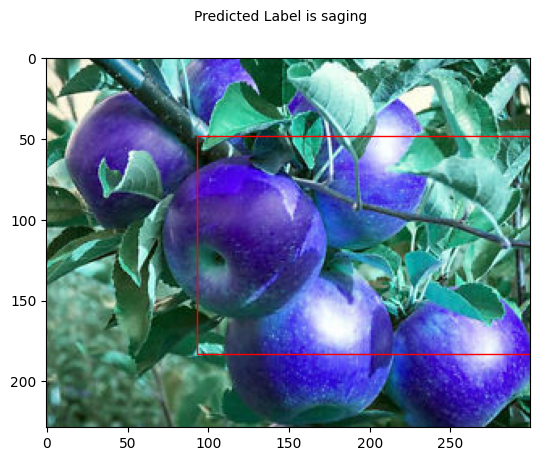

In [ ]:
#prediction stage
image_list = []
image_list.append('/content/Data/test/apple_77.jpg')

for orig_image in image_list:
  print(orig_image)
  orig_image = cv2.imread(orig_image)
  image = cv2.resize(orig_image,(224,224),interpolation = cv2.INTER_AREA)
  image = np.reshape(image,(1,224,224,3))
  #np.shape(image))
  out_tensor = model.predict(image)
  #finding the class_label
  LabelDict = {0:"apple",1:"saging", 2:"orange"}
  class_label = LabelDict[np.argmax(out_tensor[1])]
  xA,yA,xB,yB= out_tensor[0][0]
  #visualising
  fig,ax = plt.subplots()
  fig.suptitle("Predicted Label is {}".format(class_label), fontsize=10)
  ax.imshow(orig_image)
  rect = patches.Rectangle((xA,yA),xB-xA,yB-yA, linewidth=1, edgecolor='r',facecolor='none')
  ax.add_patch(rect)

  print(class_label)

In [ ]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', 'types', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', '_collections_abc', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', '_functools', 'functools', '_locale', 'copyreg', 're', 'warnings', '_stat', 'stat', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_distutils_hack', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib', 'importlib._abc', 'contextlib', 'importlib.util', 'importlib.machinery', 'google', 'google.cloud', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'site', 'runpy', 'ipykernel._version', '_json', 'json.scanner', 'json.decoder', 'json.encoder', 'json', 'errno', 'signal', '_weakrefset', 'threa